In [1]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
!git clone https://github.com/ArkZ10/Ecommerce-Classification.git

Cloning into 'NLP-Dicoding'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 5), reused 6 (delta 2), pack-reused 0
Receiving objects: 100% (29/29), 36.69 MiB | 8.40 MiB/s, done.
Resolving deltas: 100% (5/5), done.


##ML PART

In [3]:
path = '/content/Ecommerce-Classification/ecommerceDataset.csv'

In [10]:
import pandas as pd
column_names = ['category', 'text']
df = pd.read_csv(path, header=None, names=column_names)
df = df.dropna()
# df['category'] = df['category'].str.lower()
df.head()

,category,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [11]:
df.isna().any()

category    False
text        False
dtype: bool

In [12]:
df['category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: category, dtype: int64

In [16]:
df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(min(len(x), 600)))

In [17]:
df['category'].value_counts()

Books                     600
Clothing & Accessories    600
Electronics               600
Household                 600
Name: category, dtype: int64

In [18]:
df['category'].unique()

array(['Books', 'Clothing & Accessories', 'Electronics', 'Household'],
      dtype=object)

In [19]:
df.dtypes

category    object
text        object
dtype: object

In [20]:
df.shape

(2400, 2)

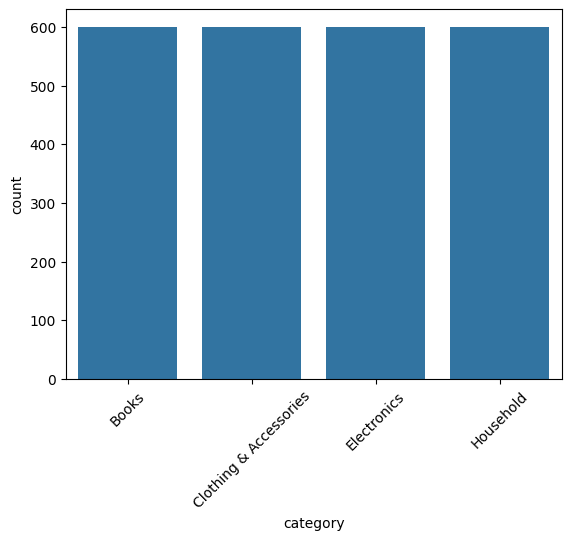

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df['category'] = df['category'].astype('category')

sns.countplot(data=df, x='category')
plt.xticks(rotation=45)
plt.show()

In [22]:
df['text_length'] = df['text'].str.len()
print(df['text_length'])

22993     841
21828     484
26810      52
22040      76
24508     299
         ... 
14540     122
4469      302
12264     227
18985     104
6994     1798
Name: text_length, Length: 2400, dtype: int64


In [23]:
df.head()

,category,text,text_length
22993,Books,A Book of Essays Revised 26th Edition 2018 Thi...,841
21828,Books,Civil Engineering 5800 + MCQs Practice Book fo...,484
26810,Books,TED Talks: The Official TED Guide to Public Sp...,52
22040,Books,Guide to Indian Railways (RRB) RPF/RPSF Consta...,76
24508,Books,"Ratna's Business Game 5-in-1 (Coin, Multicolou...",299


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 22993 to 6994
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   category     2400 non-null   category
 1   text         2400 non-null   object  
 2   text_length  2400 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 58.8+ KB


In [25]:
df['clean_text'] = df['text'].str.lower()
df['clean_text']

22993    a book of essays revised 26th edition 2018 thi...
21828    civil engineering 5800 + mcqs practice book fo...
26810    ted talks: the official ted guide to public sp...
22040    guide to indian railways (rrb) rpf/rpsf consta...
24508    ratna's business game 5-in-1 (coin, multicolou...
                               ...                        
14540    ampereus advance r.o. service kit for all kind...
4469     jaipurcrafts wall sconces 40 cm long with 6 gl...
12264    4orke copper emboss drinkware set capacity- 23...
18985    20w 20 watt 7mm hot melt glue gun with on off ...
6994     exclusivelane the 'autumn blooms' mughal hand-...
Name: clean_text, Length: 2400, dtype: object

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,category,text,text_length,clean_text
22993,Books,A Book of Essays Revised 26th Edition 2018 Thi...,841,book essays revised 26th edition 2018 new edit...
21828,Books,Civil Engineering 5800 + MCQs Practice Book fo...,484,civil engineering 5800 + mcqs practice book ss...
26810,Books,TED Talks: The Official TED Guide to Public Sp...,52,ted talks: official ted guide public speaking
22040,Books,Guide to Indian Railways (RRB) RPF/RPSF Consta...,76,guide indian railways (rrb) rpf/rpsf constable...
24508,Books,"Ratna's Business Game 5-in-1 (Coin, Multicolou...",299,"ratna's business game 5-in-1 (coin, multicolou..."


In [28]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
df['Clean_text_length'] = df['clean_text'].str.len()
df.head()

,category,text,text_length,clean_text,Clean_text_length
22993,Books,A Book of Essays Revised 26th Edition 2018 Thi...,841,book essays revised 26th edition 2018 new edit...,583
21828,Books,Civil Engineering 5800 + MCQs Practice Book fo...,484,civil engineering 5800 + mcqs practice book ss...,445
26810,Books,TED Talks: The Official TED Guide to Public Sp...,52,ted talks: official ted guide public speaking,45
22040,Books,Guide to Indian Railways (RRB) RPF/RPSF Consta...,76,guide indian railways (rrb) rpf/rpsf constable...,72
24508,Books,"Ratna's Business Game 5-in-1 (Coin, Multicolou...",299,"ratna's business game 5-in-1 (coin, multicolou...",260


##TRY 3

In [43]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Conv1D, Bidirectional
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2

In [31]:
X = df['clean_text']
y = df['category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [32]:
X_train.shape

(1920,)

In [33]:
X_val.shape

(480,)

In [34]:
np.unique(y_train)

array([0, 1, 2, 3])

In [36]:
max_words = 1000
max_len = 900
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [46]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    Dropout(0.5),
    LSTM(32),
    Dense(num_classes, activation='softmax')
])



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 900, 50)           50000     
                                                                 
 dropout_1 (Dropout)         (None, 900, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 60756 (237.33 KB)
Trainable params: 60756 (237.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
            print("\nAccuracy is more than 91$, stopping...")
            self.model.stop_training = True

callbacks = myCallback()

In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=50, batch_size=128, validation_data=(X_val_pad, y_val), callbacks=callbacks)

Epoch 1/50
15/15 [==============================] - 15s 870ms/step - loss: 1.3719 - accuracy: 0.3682 - val_loss: 1.3404 - val_accuracy: 0.5354
Epoch 2/50
15/15 [==============================] - 12s 796ms/step - loss: 1.2936 - accuracy: 0.5495 - val_loss: 1.2221 - val_accuracy: 0.5437
Epoch 3/50
15/15 [==============================] - 12s 781ms/step - loss: 1.1427 - accuracy: 0.5797 - val_loss: 1.0409 - val_accuracy: 0.5750
Epoch 4/50
15/15 [==============================] - 11s 709ms/step - loss: 0.8914 - accuracy: 0.6349 - val_loss: 0.7738 - val_accuracy: 0.6542
Epoch 5/50
15/15 [==============================] - 12s 763ms/step - loss: 0.7299 - accuracy: 0.6630 - val_loss: 0.7866 - val_accuracy: 0.6396
Epoch 6/50
15/15 [==============================] - 12s 824ms/step - loss: 0.7007 - accuracy: 0.6823 - val_loss: 0.7063 - val_accuracy: 0.7000
Epoch 7/50
15/15 [==============================] - 12s 827ms/step - loss: 0.6250 - accuracy: 0.7385 - val_loss: 0.6775 - val_accuracy: 0.7000

In [52]:
# Text 1 = Household
# Text 2 = Books
# Text 3 = Clothing & Accessories
# Text 4 = Electronics

texts = [
    "Paper Plane Design Starry Night Vangoh Wall Art Canvas Painting. Large Size Rolled Canvas Art Print (36"" X 48"") We use only the most modern and efficient printing technology on our canvases, with only the best and original inks and precision Epson< Roland and HP printers. This innovative HD printing technique results in durable and spectacular looking prints of the highest quality that last a lifetime. We print solely with top-notch inks, to achieve brilliant and true colours. Due to their high level of UV Resistance, our Canvas prints retain their beautiful colours for many years. Our canvases contain high levels of white, to ensure that the colours of your original image are reproduced exactly, with brilliant tones. Add colour and style to your living space with this digitally printed canvas painting. Some gifts are for pleasure and some for eternal bliss.So bring home this elegant Canvas print that is lushed with Rich colors that makes it nothing but sheer elegance to be gifted to your friends and family.It would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings on canvas that are high definition hd graphic digital prints for home, office or any room. A perfect size of 36 inches x 48 inches suits every size of space and are a great match with every architectural setting. We prove raw canvas prints with special left extra margins for any type of framing required which you can get done as you please. Art comes in a safe delivery tube. prints are made using latest technology and original inks to get a perfect colour and long lasting design.",
    "The Satanic Bible Amazon.com Review One might expect The Satanic Bible at least to offer a few prancing demons or a virgin sacrifice, but if you hopped this train expecting a tour of the house of horrors, you're on the wrong ride. Far from a manual for conquering the realms of earth, air, fire, and water, The Satanic Bible is Anton LaVey's manifesto of a new religion separate from the ""traditional"" Judeo-Christian definitions of Satanism. While LaVey rails against the deceit of the Christian church and white magicians, he busily weaves his own deceptions. The Satanic Bible claims the heritage of a horde of evil deities--Bile', Dagon, Moloch, and Yao Tzin to name a few--but these ancient gods have no coherent connection between each other or to Satanism, except that all have been categorized by Christianity as ""evil."" Calling on these ancient names like a magician shouting, ""Abracadabra,"" LaVey attempts to shatter the classical depiction of Satanism as a cult of black mass and child sacrifice. As the smoke clears, he leads us through a surprisingly logical argument in favor of a life focused on self-indulgence. The Satanic Bible is less bible and more philosophy (with a few rituals thrown in to keep us entertained), but this philosophy is the backbone of a religion that, until LaVey entered the scene, was merely a myth of the Christian church. It took LaVey, and The Satanic Bible, to turn this myth into a legitimate public religion. --Brian Patterson  About the Author The author of the book, Anton LaVey or Howard Stanton Levey, was an American occultist and musician. Out of sheer frustration and disregard to the hypocrisy followed by the Christian churchmen and so called pious and religious people, he found the Church of Satan. He was also the founder of LaVeyan Satanism which is a system of understanding the philosophies and human nature based on materialism and individualism. The various books authored by LaVey include The Satanic Bible, The Satanic Rituals, The Satanic Witch, The Devilâ€™s Notebook, and Satan Speaks!",
    "Selfcare Women Boy Short Panty It's a Selfcare Combo Pack of High-Waist Super Control Tummy Tucker Panty to shed your extra kilos, very useful to reduce that bulge from your waist. Now In new Boy short style this panty is Comfortable, soft feel cotton fabric, Full-seam back panel gently lifts, firms up and promotes youthful sexy rounded feminine silhouette. Tummy control (Back to Normal) for the new mom",
    "Karbonn Titanium Wind W4 (White) Karbonn Titanium Wind W4 Efficient Performance A power packed Windows phone that is pocket friendly, it is the Karbonn Titanium Wind W4. With its 512 MB RAM, this phone works smoothly with its Window 8.1 operating system which is efficient and user friendly. It has a high speed 1.2 GHz Qaud Core processor for lag-free operations. It is equipped with 4 GB internal storage capacity which can be expanded up to 32 GB with an external SD card. With so much of advanced technology, this smartphone is quite within the reach of your budget.  Sleek Design and Stunning Camera The efficiency of this device is not restricted to its performance. The efficient design with its compact dimensions, 17 x 10.6 x 5.8 cm, and light weight, 122 g, makes it ergonomics and easy to hold avoiding accidental slips or drops. The white bezel is elegant and professional. The 4 inches LCD display has a resolution of 800 x 480 pixels for a colourful and clear picture quality. It has a pixel density of 233 ppi. It has a 5 MP rear camera with autofocus. It is accompanied with an LED flash for bright pictures even in low light conditions. It is loaded with a 0.3 MP front camera for selfies, video calling and more.  Battery Backup and Connectivity Powered by 1,950 mAh Lithium-ion battery, gives you a battery backup of up to 8 hours of talk time and 240 hours of standby time. It is Wi-Fi and Bluetooth enabled for high speed data connectivity and data transfer. It comes with USB cable, earphones, Battery, Charger, User manual and Warranty card. Grab the Karbonn Titanium Wind W4 to experience cost effective and superior performance."
    ]

texts_seq = tokenizer.texts_to_sequences(texts)
texts_pad = pad_sequences(texts_seq, maxlen=max_len)
predictions = model.predict(texts_pad)
predicted_categories = [label_encoder.classes_[np.argmax(pred)] for pred in predictions]

for i, predicted_category in enumerate(predicted_categories):
    print(f'The predicted category for Text {i + 1} is: {predicted_category}')


1/1 [==============================] - 0s 122ms/step
The predicted category for Text 1 is: Household
The predicted category for Text 2 is: Books
The predicted category for Text 3 is: Clothing & Accessories
The predicted category for Text 4 is: Electronics
